In [41]:
# 1. 자동 미분

In [42]:
import tensorflow as tf

w= tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z

with tf.GradientTape() as tape :
    z=f(w)
    
gradients = tape.gradient(z,[w]) # z를 w로 미분하고 w를 대입해준 듯.
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [43]:
# 2. 자동 미분을 이용한 선형 회귀 구현

In [44]:
w = tf.Variable(4.0)
b = tf.Variable(1.0)

# @tf.fucnction annotation을 붙이면 마치 tf2.x 버전에서도 tf1.x 형태처럼 
# 그래프 생성과 실행이 분리된 형태로 해당 함수내의 로직이 실행되게 됩니다. 참고 : https://www.inflearn.com/questions/174459

@tf.function
def hypothesis(x):
    return w*x+b

x_test = [3.5,5,5.5,6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [45]:
# 오차 함수 정의
@tf.function
def mse_loss(y_pred,y):
    return tf.reduce_mean(tf.square(y_pred-y))

In [46]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [47]:
optimizer = tf.optimizers.SGD(0.01)

In [48]:
for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
        y_pred = hypothesis(x)

        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)

    # 손실 함수에 대한 파라미터 w,b의 미분값 계산
    gradients = tape.gradient(cost, [w, b])
    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if i % 10 == 0:
        print("w의 미분 값 :",gradients[0].numpy(), "b의 미분 값 :",gradients[1].numpy())
        print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))


w의 미분 값 : -421.33337 b의 미분 값 : -66.44445
epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
w의 미분 값 : -0.08866286 b의 미분 값 : 0.48123774
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
w의 미분 값 : -0.073672056 b의 미분 값 : 0.46364763
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
w의 미분 값 : -0.0707078 b의 미분 값 : 0.44495025
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
w의 미분 값 : -0.06786013 b의 미분 값 : 0.4270077
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
w의 미분 값 : -0.06512523 b의 미분 값 : 0.40978903
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
w의 미분 값 : -0.06250572 b의 미분 값 : 0.3932637
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
w의 미분 값 : -0.06002426 b의 미분 값 : 0.37739924
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
w의 미분 값 : -0.05755186 b의 미분 값 : 0.362189
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
w의 미분 값 : -0.055271626 b의 미분 값 : 0.3475793
epoch :  90 | w의

In [49]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [50]:
# 3. 케라스로 구현하는 선형 회귀

In [51]:
# Sequential()로 기반을 만들고 add를 통해 layer를 추가하는 방식. -> 파이토치에서도 자주 보는 방식이다.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

# 모델 생성
model = Sequential()
model.add(Dense(1,input_dim=1,activation = "linear")) # activation도 하나로 세트로 묶여있는 듯.

# 옵티마이저 생성
sgd = optimizers.SGD(lr=0.01)

# 손실 함수 생성
model.compile(optimizer=sgd,loss='mse',metrics=['mse'])

# 학습 시작
model.fit(x,y,epochs=300)



Epoch 1/300
1/1 [==============================] - 0s 152ms/step - loss: 4331.0371 - mse: 4331.0371


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 534.0167 - mse: 534.0167
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 66.8202 - mse: 66.8202
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 9.3337 - mse: 9.3337
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 2.2589 - mse: 2.2589
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 1.3869 - mse: 1.3869
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 1.2782 - mse: 1.2782
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2633 - mse: 1.2633
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2601 - mse: 1.2601
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 1.2582 - mse: 1.2582
Epoch 11/300
1/1 [==============================] - 0s 3ms/step - loss: 1.2566 - mse: 1.2566
Epoch 12/300
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 4ms/step - loss: 1.1625 - mse: 1.1625
Epoch 91/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1617 - mse: 1.1617
Epoch 92/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1609 - mse: 1.1609
Epoch 93/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1600 - mse: 1.1600
Epoch 94/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1592 - mse: 1.1592
Epoch 95/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1584 - mse: 1.1584
Epoch 96/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1576 - mse: 1.1576
Epoch 97/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1568 - mse: 1.1568
Epoch 98/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1560 - mse: 1.1560
Epoch 99/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1552 - mse: 1.1552
Epoch 100/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1544 - m

1/1 [==============================] - 0s 3ms/step - loss: 1.1100 - mse: 1.1100
Epoch 178/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1096 - mse: 1.1096
Epoch 179/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1092 - mse: 1.1092
Epoch 180/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1088 - mse: 1.1088
Epoch 181/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1084 - mse: 1.1084
Epoch 182/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1080 - mse: 1.1080
Epoch 183/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1076 - mse: 1.1076
Epoch 184/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1072 - mse: 1.1072
Epoch 185/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1068 - mse: 1.1068
Epoch 186/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1065 - mse: 1.1065
Epoch 187/300
1/1 [==============================] - 0s 4ms/step - loss: 1

1/1 [==============================] - 0s 3ms/step - loss: 1.0844 - mse: 1.0844
Epoch 265/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0842 - mse: 1.0842
Epoch 266/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0840 - mse: 1.0840
Epoch 267/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0838 - mse: 1.0838
Epoch 268/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0836 - mse: 1.0836
Epoch 269/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0834 - mse: 1.0834
Epoch 270/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0832 - mse: 1.0832
Epoch 271/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0830 - mse: 1.0830
Epoch 272/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0828 - mse: 1.0828
Epoch 273/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0826 - mse: 1.0826
Epoch 274/300
1/1 [==============================] - 0s 3ms/step - loss: 1

1/1 [==============================] - 0s 36ms/step


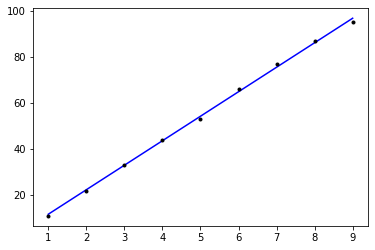

In [52]:
plt.plot(x,model.predict(x),'b',x,y,'k.')

In [53]:
print("{0}시간 공부하면 {1:.2f}점 얻을 수 있다.".format(9.5,*model.predict([9.5])[0]))

1/1 [==============================] - 0s 37ms/step
9.5시간 공부하면 102.15점 얻을 수 있다.
